<a href="https://colab.research.google.com/github/echiyembekeza/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module2-loadingdata/LS_DS_112_Loading_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Loading, Cleaning and Visualizing Data

Objectives for today:
- Load data from multiple sources into a Python notebook 
 - !curl method
 - CSV upload method
- Create basic plots appropriate for different data types
 - Scatter Plot
 - Histogram
 - Density Plot
 - Pairplot
- "Clean" a dataset using common Python libraries
 - Removing NaN values "Interpolation"

# Part 1 - Loading Data

Data comes in many shapes and sizes - we'll start by loading tabular data, usually in csv format.

Data set sources:

- https://archive.ics.uci.edu/ml/datasets.html
- https://github.com/awesomedata/awesome-public-datasets
- https://registry.opendata.aws/ (beyond scope for now, but good to be aware of)

Let's start with an example - [data about flags](https://archive.ics.uci.edu/ml/datasets/Flags).

## Lecture example - flag data

In [0]:
# Step 1 - find the actual file to download

# From navigating the page, clicking "Data Folder"
flag_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data'

# You can "shell out" in a notebook for more powerful tools
# https://jakevdp.github.io/PythonDataScienceHandbook/01.05-ipython-and-shell-commands.html

# Funny extension, but on inspection looks like a csv
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data

# Extensions are just a norm! You have to inspect to be sure what something is

Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red
Angola,4,2,1247,7,10,5,0,2,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,1,0,0,red,black
Anguilla,1,4,0,0,1,1,0,1,3,0,0,1,0,1,0,1,white,0,0,0,0,0,0,0,0,1,0,white,blue
Antigua-Barbuda,1,4,0,0,1,1,0,1,5,1,0,1,1,1,1,0,red,0,0,0,0,1,0,1,0,0,0,black,red
Argentina,2,3,2777,28,2,0,0,3,2,0,0,1,0,1,0,0,blue,0,0,0,0,0,0,0,0,0,0,blue,blue
Argentine,2,3,2777,28,2,0,0,3,3,0,0,1,1,1,0,0,blue,0,0,0,0,1,0,0,0,0,0,blue,blue
Australia,6,2,7690,15,1,1,0,0,3,1,0,1,0,1,0,0,blue,0,1,1,1,6,0,0,0,0,0,white,blue
Austria,3,1,84,8,4,0,0,3,2,1,0,0,0,1,0,0,red,0,0,0,0,0,0,0,0,0,0,red,red
Bahamas,1,4,19,0,1,1,0,3,3,0,0,1,1,0,1,0,blue,0,0,

In [0]:
# Step 2 - load the data

# How to deal with a csv? 🐼
import pandas as pd
flag_data = pd.read_csv(flag_data_url)

In [0]:
# Step 3 - verify we've got *something*
flag_data.head()

In [0]:
# Step 4 - Looks a bit odd - verify that it is what we want
flag_data.count()

In [0]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data | wc

In [0]:
# So we have 193 observations with funny names, file has 194 rows
# Looks like the file has no header row, but read_csv assumes it does
help(pd.read_csv)

In [0]:
?pd.read_csv

In [0]:
??pd.read_csv

In [0]:
# Alright, we can pass header=None to fix this
flag_data = pd.read_csv(flag_data_url, header=None)
flag_data.head()

In [0]:
flag_data.count()

In [0]:
flag_data.isna().sum()

### Yes, but what does it *mean*?

This data is fairly nice - it was "donated" and is already "clean" (no missing values). But there are no variable names - so we have to look at the codebook (also from the site).

```
1. name: Name of the country concerned
2. landmass: 1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania
3. zone: Geographic quadrant, based on Greenwich and the Equator; 1=NE, 2=SE, 3=SW, 4=NW
4. area: in thousands of square km
5. population: in round millions
6. language: 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic, 9=Japanese/Turkish/Finnish/Magyar, 10=Others
7. religion: 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others
8. bars: Number of vertical bars in the flag
9. stripes: Number of horizontal stripes in the flag
10. colours: Number of different colours in the flag
11. red: 0 if red absent, 1 if red present in the flag
12. green: same for green
13. blue: same for blue
14. gold: same for gold (also yellow)
15. white: same for white
16. black: same for black
17. orange: same for orange (also brown)
18. mainhue: predominant colour in the flag (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue)
19. circles: Number of circles in the flag
20. crosses: Number of (upright) crosses
21. saltires: Number of diagonal crosses
22. quarters: Number of quartered sections
23. sunstars: Number of sun or star symbols
24. crescent: 1 if a crescent moon symbol present, else 0
25. triangle: 1 if any triangles present, 0 otherwise
26. icon: 1 if an inanimate image present (e.g., a boat), otherwise 0
27. animate: 1 if an animate image (e.g., an eagle, a tree, a human hand) present, 0 otherwise
28. text: 1 if any letters or writing on the flag (e.g., a motto or slogan), 0 otherwise
29. topleft: colour in the top-left corner (moving right to decide tie-breaks)
30. botright: Colour in the bottom-left corner (moving left to decide tie-breaks)
```

Exercise - read the help for `read_csv` and figure out how to load the data with the above variable names. One pitfall to note - with `header=None` pandas generated variable names starting from 0, but the above list starts from 1...

## Loading from a local CSV to Google Colab

# Part 2 - Basic Visualizations

## Basic Data Visualizations Using Matplotlib

In [0]:
import matplotlib.pyplot as plt

# Scatter Plot

In [0]:
# Histogram

In [0]:
# Seaborn Density Plot

In [0]:
# Seaborn Pairplot

## Create the same basic Visualizations using Pandas

In [0]:
# Pandas Histogram - Look familiar?

In [0]:
# Pandas Scatterplot

In [0]:
# Pandas Scatter Matrix - Usually doesn't look too great.

# Part 3 - Deal with Missing Values

## Diagnose Missing Values

Lets use the Adult Dataset from UCI. <https://github.com/ryanleeallred/datasets>

## Fill Missing Values

## Your assignment - pick a dataset and do something like the above

This is purposely open-ended - you can pick any data set you wish. It is highly advised you pick a dataset from UCI or a similar semi-clean source. You don't want the data that you're working with for this assignment to have any bigger issues than maybe not having headers or including missing values, etc.

After you have chosen your dataset, do the following:

- Import the dataset using the method that you are least comfortable with (!curl or CSV upload).
 - Make sure that your dataset has the number of rows and columns that you expect.
 - Make sure that your dataset has appropriate column names, rename them if necessary.
 - If your dataset uses markers like "?" to indicate missing values, replace them with NaNs during import.
- Identify and fill missing values in your dataset (if any)
 - Don't worry about using methods more advanced than the `.fillna()` function for today.
- Create one of each of the following plots using your dataset
 - Scatterplot
 - Histogram
 - Density Plot
 - Pairplot (note that pairplots will take a long time to load with large datasets or datasets with many columns)

If you get that done and want to try more challenging or exotic things, go for it! Use documentation as illustrated above, and follow the 20-minute rule (that is - ask for help if you're stuck!).

If you have loaded a few traditional datasets, see the following section for suggested stretch goals.

In [1]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed

# TODO your work here!
# And note you should write comments, descriptions, and add new

#First things first...find a dataset to use
#We will import this data by copying the link
#But first, we have to import the libraries that we will be using

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#let's name the data we are loading something descriptive

student_data_url = 'https://ed-public-download.app.cloud.gov/downloads/Most-Recent-Cohorts-Scorecard-Elements.csv' #paste the link to the data
student_data = pd.read_csv(student_data_url)#this is loading the data using the pandas library function

#we can visualize the first few lines of the data by doing the following
student_data.head()
#Great! it worked. Let's look at what we have...and see what we may be able to visualize.
#Looks like there are plenty of things that we are able to look at.



,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,INSTURL,NPCURL,HCM2,PREDDEG,...,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GT_25K_P6,GT_28K_P6,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,www.aamu.edu/,www2.aamu.edu/scripts/netpricecalc/npcalc.htm,0,3,...,0.7667,0.0859,31000,0.453,0.431,32750,348.16551225731,0.2531554273,NaN,0.2913
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,www.uab.edu,uab.studentaidcalculator.com/survey.aspx,0,3,...,0.5179,0.2363,41200,0.669,0.631,21833,232.106797835537,0.513963161,NaN,0.5384
2,100690,2503400,25034,Amridge University,Montgomery,AL,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,0,3,...,0.8436,0.8571,39600,0.658,0.542,22890,243.343773299842,0.2307692308,NaN,PrivacySuppressed
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,www.uah.edu,finaid.uah.edu/,0,3,...,0.4312,0.2255,46700,0.685,0.649,22647,240.760438353933,0.5485090298,NaN,0.4905
4,100724,100500,1005,Alabama State University,Montgomery,AL,www.alasu.edu,www.alasu.edu/cost-aid/forms/calculator/index....,0,3,...,0.8113,0.0974,27700,0.393,0.351,31500,334.876752247489,0.2185867473,NaN,0.2475


In [2]:
#Let's figure out which columns have NaN values and work to fix those errors
student_data.isnull().sum()
student_data

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,INSTURL,NPCURL,HCM2,PREDDEG,...,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GT_25K_P6,GT_28K_P6,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,www.aamu.edu/,www2.aamu.edu/scripts/netpricecalc/npcalc.htm,0,3,...,0.7667,0.0859,31000,0.453,0.431,32750,348.16551225731,0.2531554273,NaN,0.2913
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,www.uab.edu,uab.studentaidcalculator.com/survey.aspx,0,3,...,0.5179,0.2363,41200,0.669,0.631,21833,232.106797835537,0.513963161,NaN,0.5384
2,100690,2503400,25034,Amridge University,Montgomery,AL,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,0,3,...,0.8436,0.8571,39600,0.658,0.542,22890,243.343773299842,0.2307692308,NaN,PrivacySuppressed
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,www.uah.edu,finaid.uah.edu/,0,3,...,0.4312,0.2255,46700,0.685,0.649,22647,240.760438353933,0.5485090298,NaN,0.4905
4,100724,100500,1005,Alabama State University,Montgomery,AL,www.alasu.edu,www.alasu.edu/cost-aid/forms/calculator/index....,0,3,...,0.8113,0.0974,27700,0.393,0.351,31500,334.876752247489,0.2185867473,NaN,0.2475
5,100751,105100,1051,The University of Alabama,Tuscaloosa,AL,www.ua.edu/,financialaid.ua.edu/net-price-calculator/,0,3,...,0.4007,0.0810,44500,0.695,0.679,23290,247.596176502985,0.6019442985,NaN,0.6793
6,100760,100700,1007,Central Alabama Community College,Alexander City,AL,www.cacc.edu,www.cacc.edu/NetPriceCalculator/14-15/npcalc.html,0,2,...,0.3234,0.2630,27700,0.466,0.395,9500,100.994576074639,0.2510056315,0.2136,NaN
7,100812,100800,1008,Athens State University,Athens,AL,www.athens.edu,https://24.athens.edu/apex/prod8/f?p=174:1:394...,0,3,...,0.6455,0.6774,38700,0.653,0.612,18000,191.358144141422,0.5038167939,NaN,NaN
8,100830,831000,8310,Auburn University at Montgomery,Montgomery,AL,www.aum.edu,www.aum.edu/current-students/financial-informa...,0,3,...,0.5565,0.2257,33300,0.616,0.546,23363,248.372240087558,0.4418886199,NaN,0.2207
9,100858,100900,1009,Auburn University,Auburn,AL,www.auburn.edu,https://www.auburn.edu/admissions/netpricecalc...,0,3,...,0.3280,0.0427,48800,0.741,0.726,21500,228.566672168921,0.7239612977,NaN,0.74


In [0]:
x = student_data.PCTFLOAN.dropna()
y = student_data.PCTPELL.dropna()

Text(0, 0.5, 'Percent of studetns with Pell')

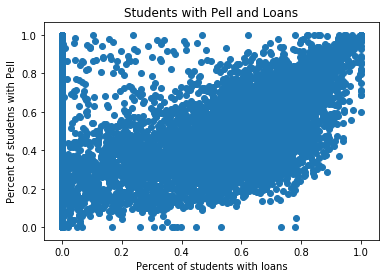

In [4]:
plt.scatter(x, y)
plt.title('Students with Pell and Loans')
plt.xlabel('Percent of students with loans')
plt.ylabel('Percent of studetns with Pell')

Text(0.5, 1.0, 'Histogram of Students with Loans')

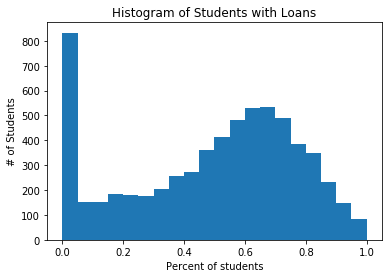

In [5]:
plt.hist(x,20) #histogram with 20 bins
plt.xlabel('Percent of students')
plt.ylabel('# of Students')
plt.title('Histogram of Students with Loans')


Text(0.5, 1.0, 'Histogram of Students with Pell')

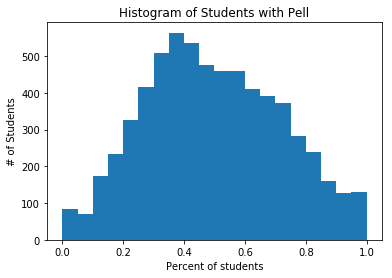

In [6]:
plt.hist(y, 20)
plt.xlabel('Percent of students')
plt.ylabel('# of Students')
plt.title('Histogram of Students with Pell')

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


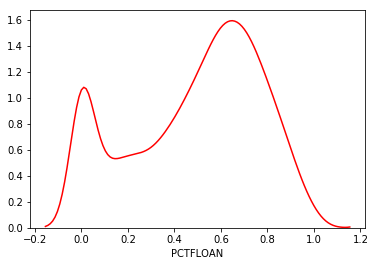

In [7]:
import seaborn as sns
sns.distplot(student_data['PCTFLOAN'], hist=False, color='r')

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


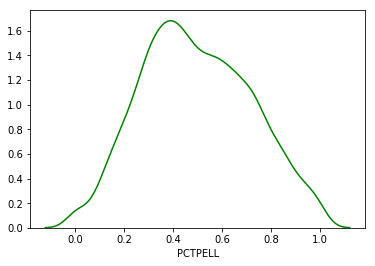

In [8]:
sns.distplot(student_data['PCTPELL'], hist=False, color='g')

In [0]:
# Seaborn Pairplot
sns.set(style='ticks', color_codes=True)
sns.pairplot(student_data)

In [0]:
from pandas.plotting import scatter_matrix

scatter_matrix(student_data)
plt.show()

## Stretch Goals - Other types and sources of data

Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.